<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

data=pd.read_csv('final_final.csv')
data

,Gu,area,center,code,safe_home,people,women,restrict,economy,ctv,attendance,crime
0,종로구,23.91,0.083647,11010,1.463823,1142.116333,589,0.348390,1172,0.075778,10.971134,113.425346
1,중구,9.96,0.301205,11020,3.714859,2464.257080,1294,0.000000,4885,0.197189,7.014125,287.248993
2,용산구,21.87,0.228624,11030,1.554641,1795.610352,966,0.000000,471,0.115750,2.394018,108.870598
3,성동구,16.86,0.355872,11040,1.364176,2665.836182,1353,0.000000,623,0.204105,3.740473,125.266899
4,광진구,17.06,0.117233,11050,1.758499,3876.905273,2033,0.110785,350,0.193647,4.852549,180.949600
5,동대문구,14.22,0.492264,11060,3.516174,4591.420410,2311,0.000000,505,0.180373,13.850285,208.087204
6,중랑구,18.50,0.486486,11070,1.783784,3269.560000,1658,0.250811,217,0.207894,3.436626,173.513519
7,성북구,24.58,0.528885,11080,1.708706,2643.810000,1463,0.216029,212,0.147949,1.810606,98.087875
8,강북구,23.60,0.254237,11090,1.567797,2052.033000,1103,0.494492,120,0.134915,5.339812,97.500000
9,도봉구,20.65,0.048426,11100,1.355932,1833.070000,1020,0.493947,136,0.088761,8.617375,90.072639


# **정규화,시각화**

### **cctv**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-160-f12b95bde483>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cluster'] = model.fit_predict(data_scale)


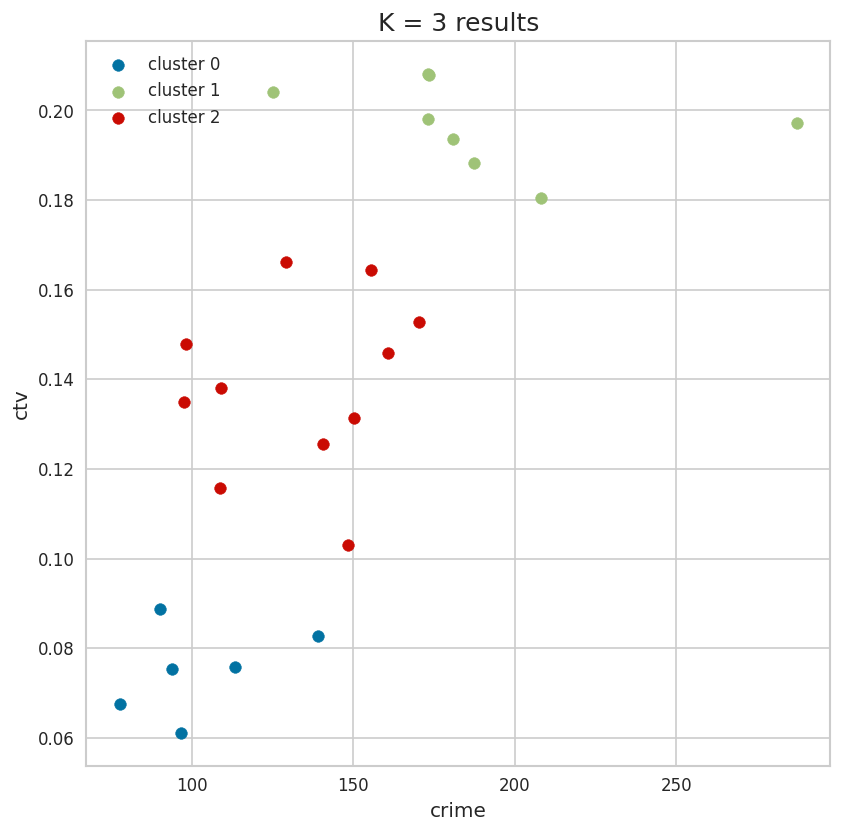

In [160]:
##정규화
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data1 = data[['crime','ctv']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data1)


##k-means 알고리즘 학습
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data1['cluster'] = model.fit_predict(data_scale)




##시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data1.loc[data1['cluster'] == i, 'crime'], data1.loc[data1['cluster'] == i, 'ctv'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('crime', size = 12)
plt.ylabel('ctv', size = 12)
plt.show()

### **economy**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-134-4d018a6bd5bf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster'] = model.fit_predict(data_scale)


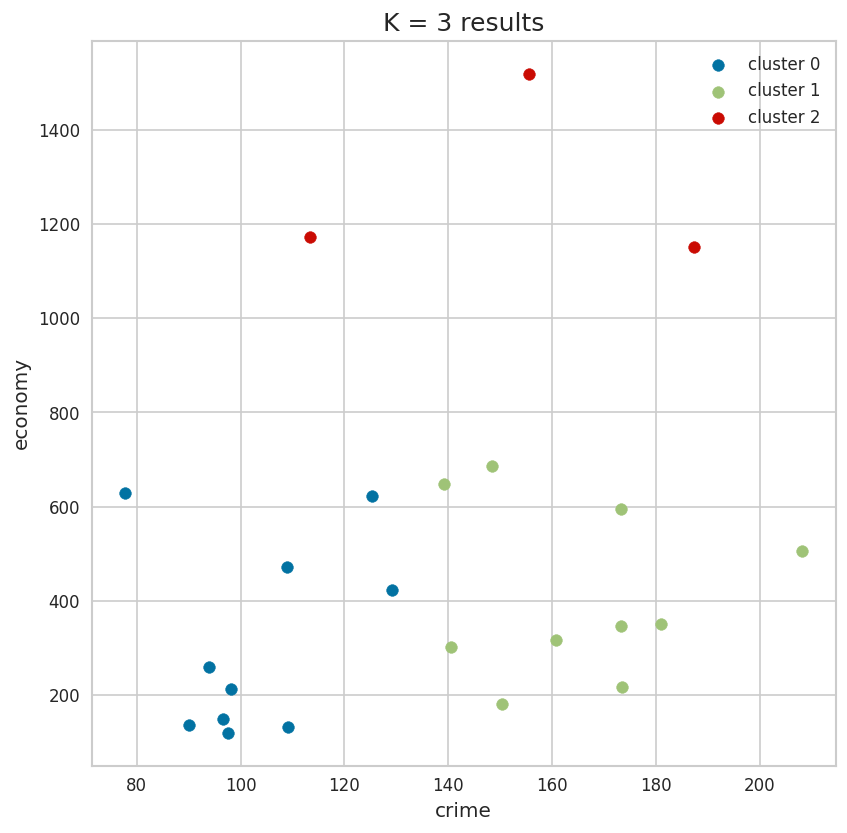

In [ ]:
##정규화
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data2 = data[['crime','economy']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data2)





##k-means 알고리즘 학습
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data2['cluster'] = model.fit_predict(data_scale)






##시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data2.loc[data2['cluster'] == i, 'crime'], data2.loc[data2['cluster'] == i, 'economy'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('crime', size = 12)
plt.ylabel('economy', size = 12)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

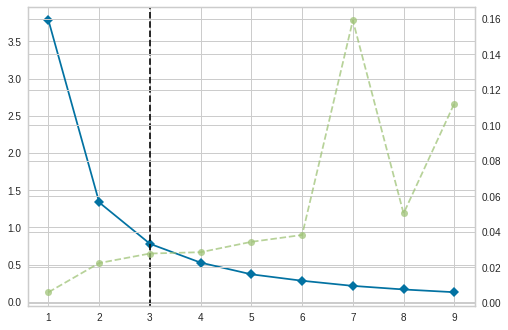

In [ ]:
##elbow로 k결정
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [ ]:
##시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data.loc[data['cluster'] == i, 'crime'], data.loc[data['cluster'] == i, 'ctv'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('crime', size = 12)
plt.ylabel('ctv', size = 12)
plt.show()